In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import random
%matplotlib inline

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

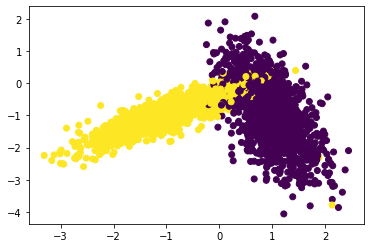

In [2]:
#colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
def grouper(X, y, folds): # Function to split/grouping Train data into K-flods
    if folds > len(X):
        raise ValueError('Fold Values cannot be greater than Row of X')
    X_groups = []
    y_groups = []
    diff = len(X)//folds
    for i in tqdm(range(0, len(X), diff)):
        X_groups.append(X[i : i + diff , :])
        y_groups.append(y[i : i + diff])
    return X_groups, y_groups

In [4]:
def RandomSearchCV(x_train, y_train, a_b, kfold): # Random SearchCV function
    X, y = grouper(X_train, y_train, kfold) #Calling Grouper function for splitting
    k = np.array(random.sample(range(a_b[0], a_b[1]), 10)) #Generating random 10 intergers
    train_acc = []
    cv_acc = []
    train_mean = []
    cv_mean = []
    for i in tqdm(range(len(X))): 
        for K in k:
            knn = KNeighborsClassifier(n_neighbors = K) #Creating KNN object
            knn.fit(X[i], y[i]) #Fitting into KNN
            pred = knn.predict(X[i]) #Predicting
            train_acc.append(accuracy_score(y[i], pred)) #Appending accuracy into train_acc
            pred = knn.predict(X[-i]) #Predicting
            cv_acc.append(accuracy_score(y[-i], pred)) #Appending accuracy into cv_acc
        train_mean.append(np.mean(np.array(train_acc))) #Taking mean of accuracy
        cv_mean.append(np.mean(np.array(cv_acc))) #Taking mean of accuracy
    return train_mean, cv_mean, k #Return

In [5]:
def best_param(acc_score, k):  #Function for getting best n_estimator/K  
    temp = {}
    for i in tqdm(range(len(cv_acc))): #Creating dictionary of accuracy and K
        temp[cv_acc[i]] = k[i]
    sorted_temp = sorted(temp, reverse = True) #Sorting will give list
    dic = {}
    for i in tqdm(range(len(cv_acc))): #Recreating dictionary using above list
        dic[sorted_temp[i]] = temp.get(sorted_temp[i])
    return list(dic.items())[0][1] #Return just one top K based on best accuracy

In [6]:
train_acc, cv_acc, K = RandomSearchCV(X_train, y_train, (1, 50), 10) #Calling RadomSearchCV

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.81it/s]


In [7]:
print('Traning Mean Accuracy:',train_acc) #Printing Trianing Accuracy

Traning Mean Accuracy: [0.9573333333333334, 0.9570000000000002, 0.9603111111111111, 0.9580000000000002, 0.95904, 0.9605777777777776, 0.9584000000000001, 0.95755, 0.9582222222222222, 0.9581600000000001]


In [8]:
print('CV Mean Accuracy:', cv_acc) #Printing CV Accuracy

CV Mean Accuracy: [0.9573333333333334, 0.9569333333333333, 0.9570666666666666, 0.9552666666666667, 0.9526400000000002, 0.9552444444444445, 0.9560571428571429, 0.95525, 0.9558962962962962, 0.9559200000000001]


In [9]:
best_K = best_param(cv_acc, K) #Calling best_param to get best K

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


In [10]:
clf = KNeighborsClassifier(n_neighbors = best_K) 
clf.fit(X_train, y_train) 
pred_test = clf.predict(X_test) #Predicting for Test Data
print('Test Accuracy:',accuracy_score(y_test, pred_test)*100)

Test Accuracy: 96.6


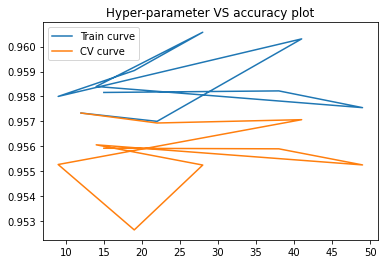

In [11]:
plt.plot(K, train_acc, label='Train curve') 
plt.plot(K, cv_acc, label='CV curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

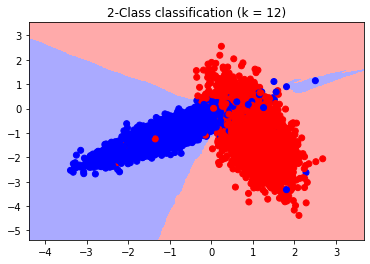

In [12]:
def plot_decision_boundary(X1, X2, y, clf): #Reference : Assignment_4_Reference
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, clf)